In [2]:
# I.
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np

# II
# Download reference table
w_land = pd.read_csv('/home/hmdg/Documents/Data_Science/Repos/Lands/data/w_land.csv')

#  wlands Backup
w_land = w_land.copy()



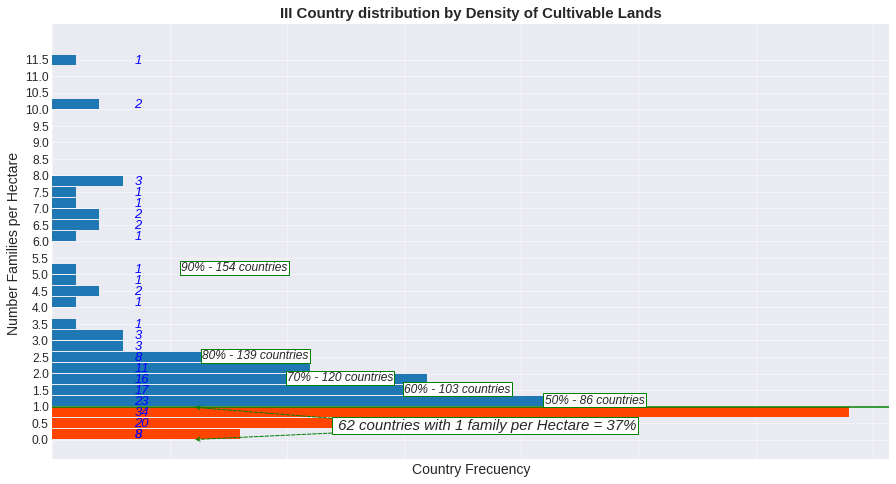

In [5]:
# III Histogram 

plt.style.use('seaborn-darkgrid') 

plt.rcParams.update({'xtick.labelsize':12,
                     'ytick.labelsize':12,
                     'ytick.labelleft':'on',
                     'ytick.labelright':'off',
                     'xtick.labelbottom':'off',
                     'axes.spines.left': False,
                     'axes.spines.bottom' : False,
                     'axes.spines.top': False,
                     'axes.spines.right':False,
                     'ytick.left':False,
                     'xtick.bottom':False,
                     'xtick.top': False,
                     'axes.labelsize':14,
                     'axes.edgecolor':'slategrey',
                     'grid.linewidth':0.5
                    })

fig = plt.figure(figsize=(15,8))

### Graph 5
a_bins = 36
ax5, bins, patches5 = plt.hist(w_land['density_CL'],  orientation='horizontal', bins= a_bins,
                            range= (0, 12), rwidth=0.9) 

plt.ylabel('Number Families per Hectare ')
plt.xlabel('Country Frecuency')
plt.title('III Country distribution by Density of Cultivable Lands', weight='bold', size=15)
plt.yticks(np.arange(0, 12, 0.5))

count_width = 0
for f in range(0,3):
    patches5[f].set_fc('orangered'),
    count_width += int(patches5[f].get_width())

# # Adding the value of each bar 
high = 0.03
texto = lambda t: plt.text(3.5, high + t.xy[1], int(t.get_width()),size=13, 
                            fontstyle='oblique', color='blue') #fontweight='bold',
vfunc = np.vectorize(texto)

p = [patches5[i] for i in range(len(patches5)) if patches5[i].get_width() > 0]
## Filter the 0 width columns 
vfunc(p)

# Adding the text box
plt.text(12, 0.3, ' ' +str(count_width) + ' countries with 1 family per Hectare = 37%', 
         fontsize=15, fontstyle='oblique', #patches5[3].xy[1]
         bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='green'))

plt.text(21, patches5[4].xy[1]-0.25, '50% - 86 countries', 
         fontsize=12, fontstyle='oblique', #patches5[3].xy[1]
         bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='green'))

plt.text(15, patches5[5].xy[1]-0.25, '60% - 103 countries', 
         fontsize=12, fontstyle='oblique', #patches5[3].xy[1]
         bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='green'))

plt.text(10, patches5[6].xy[1]-0.25, '70% - 120 countries', 
         fontsize=12, fontstyle='oblique', #patches5[3].xy[1]
         bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='green'))

plt.text(6.4, patches5[8].xy[1]-0.25, '80% - 139 countries', 
         fontsize=12, fontstyle='oblique', #patches5[3].xy[1]
         bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='green'))

plt.text(5.5, patches5[16].xy[1]-0.25, '90% - 154 countries', 
         fontsize=12, fontstyle='oblique', #patches5[3].xy[1]
         bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='green'))


# Additional styling
plt.axhline(y=1, color='green') # Adding the reference line
plt.annotate("", xy=(12, 0.20), xytext=(6, 0),  arrowprops=dict(arrowstyle="<-", lw= 1, linestyle='--', color='green'))
plt.annotate("", xy=(12, 0.64), xytext=(6, 0.98),  arrowprops=dict(arrowstyle="<-", lw= 1, linestyle='--', color='green'))

plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/hist_dens_CL.png')
plt.show()
